# Twitter dataset analysis

## Run pipelines

In [1]:
# IMPORTS
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from pipelines import Orchestrator
from analysis_helper import AnalysisHelper

INFO - datasources.tw.tw - load config file
INFO - datasources.tw.proxy_provider - getting proxy list
INFO - datasources.tw.proxy_provider - reading proxy list json file
DEBUG - datasources.tw.tw_api - INIT Tw api
DEBUG - datasources.tw.tw_premium_api - INIT Tw premium api
INFO - datasources.tw.tw - INIT Tw
DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# LOGGING LEVEL
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [3]:
# CONFIGS
project_name = 'uk_healthcare'

# cd_config = ('infomap', {})
cd_config = ('demon', {
    'epsilon': 0.25,
    'min_community_size': 3
})

In [4]:
# PIPELINE
o = Orchestrator(project_name, cd_config)
results = o.execute()

## Analysis

### Event and graph analysis

#### Events summary

In [5]:
display(AnalysisHelper.get_single_summary('event_detection', 'event', results))

,end_date,hashtags,location,start_date
name,,,,
16-days-of-action-2018,2018-12-10,"[#16days, #16daysofaction, #16daysofactiontool...",United Kingdom,2018-11-25
elf-day,2018-12-12,"[#elfday, #elfday2018]",United Kingdom,2018-12-03
dry-january-2018,2018-01-31,[#dryjanuary],United Kingdom,2018-01-01
cervical-cancer-prevention-week-2018,2018-01-27,[#cervicalcancer],United Kingdom,2018-01-21
time-to-talk-day-2018,2018-02-07,[#timetotalk],United Kingdom,2018-02-06
eating-disorder-awareness-week-2018,2018-03-03,"[#edaw18, #edaw2018, #eatingdisordersawareness...",United Kingdom,2018-02-25


#### Event's graphs

In [6]:
display(AnalysisHelper.get_single_summary('network_creation', 'graph_summary', results))

,assortativity,avg_clustering,avg_degree,avg_weighted_degree,connected,density,no_edges,no_nodes,strongly_conn_components
name,,,,,,,,,
16-days-of-action-2018,-0.1319,0.0100,1.7626,1.9091,False,0.0022,349,396,394
elf-day,-0.1822,0.1003,2.3890,2.4986,False,0.0033,436,365,357
dry-january-2018,-0.2833,0.0276,1.9915,2.0170,False,0.0043,234,235,231
cervical-cancer-prevention-week-2018,-0.0909,0.0612,1.8373,1.9522,False,0.0044,192,209,204
time-to-talk-day-2018,-0.2489,0.0389,1.7239,1.9254,False,0.0032,231,268,265
eating-disorder-awareness-week-2018,-0.1544,0.0304,1.8828,1.9844,False,0.0037,241,256,253


* *# nodes*: number of users.
* *# edges*: number of relations between users.
* *avg degree*: average number of edges per node.
* *avg degree*: average weigth sum per node.
* *density*: expresses the how sparse is the adjacency matrix (i.e. how likely that a node has edges). 0 for a graph without edges and 1 for a complete graph.

\begin{align}
&\begin{aligned}
d = \frac{m}{n(n-1)}
\end{aligned}\\
&\begin{aligned}
m = \text{# edges}
\end{aligned}\\
&\begin{aligned}
n = \text{# nodes}
\end{aligned}
\end{align}

* *connected*: for each pairs of nodes exists a path that connects them.
* *strongly connected components*: group of nodes for which for each pair of nodes exists a path that connects them. Can be broadly relatable to the concept of community.
* *avg clustering*: average for each node of the fraction of possible triangles through that node that exist.
* *assortativity*: measures how much nodes are likely to connect to nodes with the same degree (>0) or with a different degree (<0).

### Community Detection analysis

#### Partitions summary

In [7]:
partitions_summary = AnalysisHelper.get_multi_summary('community_detection', 'partition_summary', results)

for ds_name, ds in partitions_summary.items():
    print(f'event "{ds_name}":')
    display(ds)

event "16-days-of-action-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,1,0,0.0,0.0,0.0,True,1,0.0,NaN
1,1,0,0.0,0.0,0.0,True,1,0.0,NaN
2,1,0,0.0,0.0,0.0,True,1,0.0,NaN
3,1,0,0.0,0.0,0.0,True,1,0.0,NaN
4,1,0,0.0,0.0,0.0,True,1,0.0,NaN
5,1,0,0.0,0.0,0.0,True,1,0.0,NaN
6,1,0,0.0,0.0,0.0,True,1,0.0,NaN
7,1,0,0.0,0.0,0.0,True,1,0.0,NaN
8,1,0,0.0,0.0,0.0,True,1,0.0,NaN


event "elf-day":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,5,10,4.0000,4.4,0.5000,True,3,0.4882,-0.4082
1,11,27,4.9091,6.0,0.2455,True,9,0.4245,-0.2781


event "dry-january-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,4,6,3.0,3.0,0.5,True,3,0.45,NaN


event "cervical-cancer-prevention-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,4,9,4.5,4.5000,0.7500,True,2,0.6833,NaN
1,7,14,4.0,5.4286,0.3333,True,5,0.3952,0.0


event "time-to-talk-day-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,5,11,4.4,4.4,0.55,True,4,0.5444,-0.2887


event "eating-disorder-awareness-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,4,8,4.0,4.0,0.6667,True,3,0.5833,-0.3333
1,4,11,5.5,5.5,0.9167,True,2,0.8125,-0.2887


#### Partition quality metrics

In [8]:
pquality = AnalysisHelper.get_multi_summary('community_detection', 'pquality', results)

for ds_name, ds in pquality.items():
    print(f'event "{ds_name}":')
    display(ds)

event "16-days-of-action-2018":


,min,max,avg,std
index,,,,
internal_density,0.0,0.000000,0.000000,0.000000
edges_inside,0.0,1.000000,0.005051,0.070887
normalized_cut,0.0,1.009929,0.589215,0.492028
avg_degree,0.0,2.000000,0.010101,0.141774
fomd,0.0,0.000000,0.000000,0.000000
expansion,0.0,7.000000,0.876263,1.062369
cut_ratio,0.0,0.017722,0.002218,0.002690
conductance,0.0,1.000000,0.587963,0.490989
max_odf,1.0,29.000000,1.752525,2.062011


event "elf-day":


,min,max,avg,std
index,,,,
internal_density,0.122727,0.250000,0.186364,0.063636
edges_inside,10.000000,27.000000,18.500000,8.500000
normalized_cut,0.000000,0.000000,0.000000,0.000000
avg_degree,4.000000,4.909091,4.454545,0.454545
fomd,0.200000,0.363636,0.281818,0.081818
expansion,0.000000,0.000000,0.000000,0.000000
cut_ratio,0.000000,0.000000,0.000000,0.000000
conductance,0.000000,0.000000,0.000000,0.000000
max_odf,0.000000,0.000000,0.000000,0.000000


event "dry-january-2018":


,min,max,avg,std
index,,,,
internal_density,0.25,0.25,0.25,0.0
edges_inside,6.00,6.00,6.00,0.0
normalized_cut,0.00,0.00,0.00,0.0
avg_degree,3.00,3.00,3.00,0.0
fomd,0.25,0.25,0.25,0.0
expansion,0.00,0.00,0.00,0.0
cut_ratio,0.00,0.00,0.00,0.0
conductance,0.00,0.00,0.00,0.0
max_odf,0.00,0.00,0.00,0.0


event "cervical-cancer-prevention-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.166667,0.375,0.270833,0.104167
edges_inside,9.000000,14.000,11.500000,2.500000
normalized_cut,0.000000,0.000,0.000000,0.000000
avg_degree,4.000000,4.500,4.250000,0.250000
fomd,0.285714,0.500,0.392857,0.107143
expansion,0.000000,0.000,0.000000,0.000000
cut_ratio,0.000000,0.000,0.000000,0.000000
conductance,0.000000,0.000,0.000000,0.000000
max_odf,0.000000,0.000,0.000000,0.000000


event "time-to-talk-day-2018":


,min,max,avg,std
index,,,,
internal_density,0.275,0.275,0.275,0.0
edges_inside,11.000,11.000,11.000,0.0
normalized_cut,0.000,0.000,0.000,0.0
avg_degree,4.400,4.400,4.400,0.0
fomd,0.400,0.400,0.400,0.0
expansion,0.000,0.000,0.000,0.0
cut_ratio,0.000,0.000,0.000,0.0
conductance,0.000,0.000,0.000,0.0
max_odf,0.000,0.000,0.000,0.0


event "eating-disorder-awareness-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.333333,0.458333,0.395833,0.0625
edges_inside,8.000000,11.000000,9.500000,1.5000
normalized_cut,0.000000,0.000000,0.000000,0.0000
avg_degree,4.000000,5.500000,4.750000,0.7500
fomd,0.500000,0.500000,0.500000,0.0000
expansion,0.000000,0.000000,0.000000,0.0000
cut_ratio,0.000000,0.000000,0.000000,0.0000
conductance,0.000000,0.000000,0.000000,0.0000
max_odf,0.000000,0.000000,0.000000,0.0000


Survey of community measures: https://github.com/Lab41/survey-community-detection 
* *Internal density*: number of edges (ms) in subset S divided by the total number of possible edges between all nodes (ns(ns-1)/2). Higher the better
* *Average degree*: average internal degree across all nodes (ns) in subset S. Higher the better.
* *FOMD (Fraction over median degree)*: Determines the number of nodes that have an internal degree greater than the median degree of nodes in Subset S. Higher the better.
* *Expansion*: can be thought as “External Degree”. Measure of separability. Lower the better.
* *Cut Ratio*: This metric is a measure of separability and can be thought of as "External Density". Lower the better.
* *Conductance*: Ratio of edges inside the cluster to the number of edges leaving the cluster (captures surface area to volume). Higher the better.
* *Normalized Cut*: Represents how well subset S is separated from graph G. Combines Conductance with the fraction of external edges over all non-community edges. Higher the better.
* *Maximum ODF (Out Degree Fraction)*: Fraction of external conections to internal connections for each node (ns) in S. It then returns the fraction with the highest value. Lower the better.
* *Average ODF*: same as Maximum ODF but takes the average. Lower the better.
* *Flake-ODF*: Fraction of the number of nodes that have fewer internal connections than external connections to the number of nodes (ns) in subset S. Higher the better.

#### Cumulative sum of degree distribution

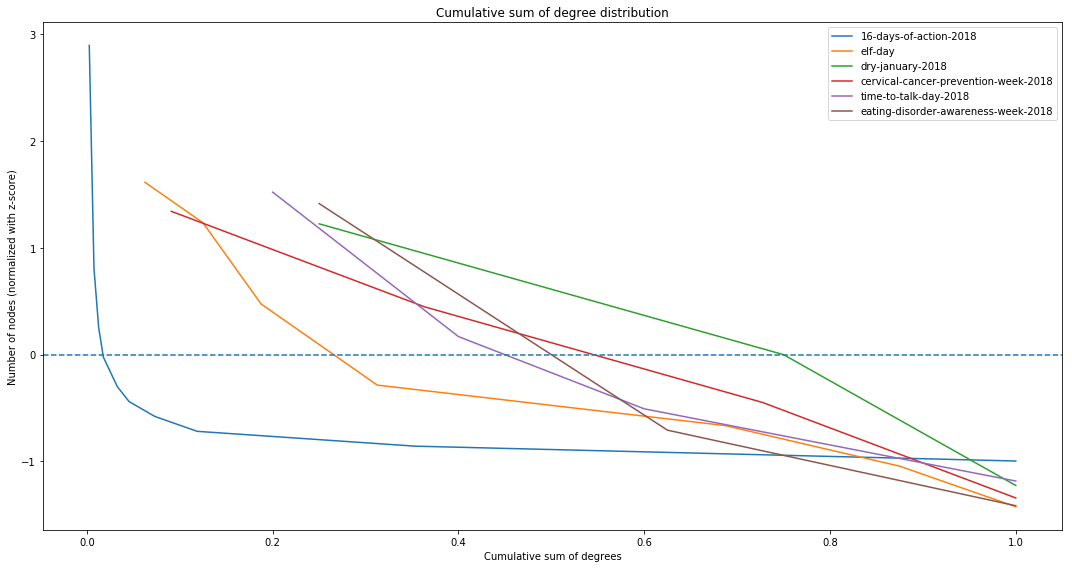

In [9]:
AnalysisHelper.plot_compare_cumsum_deg_dist(results);

Cumulative sum of degree distribution shows how the degree is distributed with respect to the number of nodes.

* Nodes with a lower degree (left on the plot) are typically way less than the ones with a high degree (right on the plot).

* Over the dotted line there's a number of node above the mean (the converse below the line) as per z-score.

* Z-score normalization for the number of nodes has been chosen because it preserves the range (maximum and minimum) and introduces the dispersion of the serie (standard deviation / variance)

\begin{align}
P(k) = \frac{\text{# nodes with degree >= k}}{\text{# nodes}}
\end{align}

Cumulative sum of degree distribution is more robust wrt the simple degree distribution because is less subject to small numbers. 

#### Common nodes

In [10]:
display(AnalysisHelper.get_common_nodes('community_detection', 'nodes', results))

,user_name


Number of appearances of nodes across different events.

#### Users across events

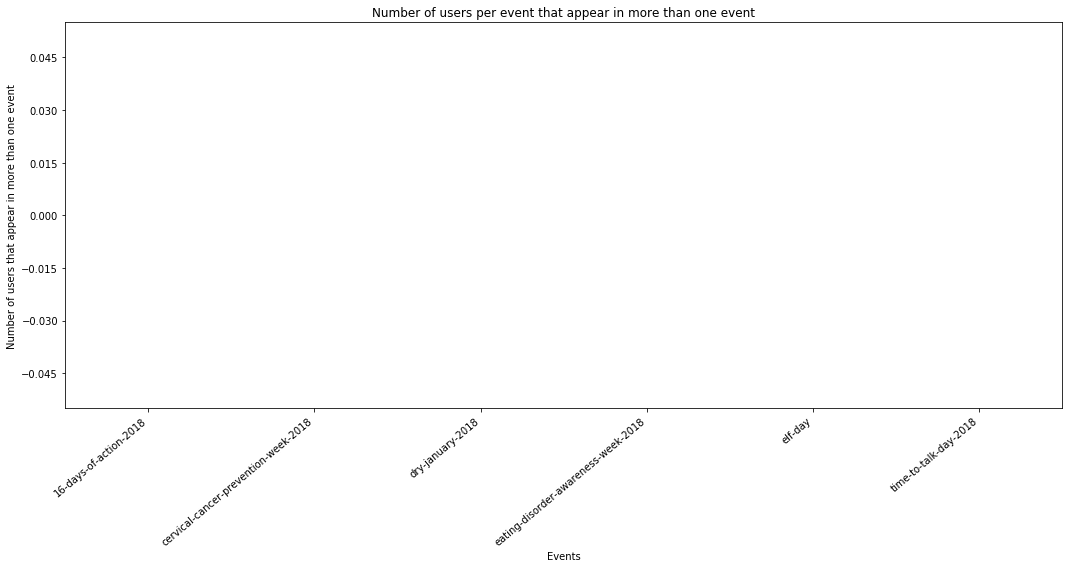

In [11]:
AnalysisHelper.plot_events_with_common_nodes('community_detection', 'nodes', results);

Number of users per event that appear in more than one event.